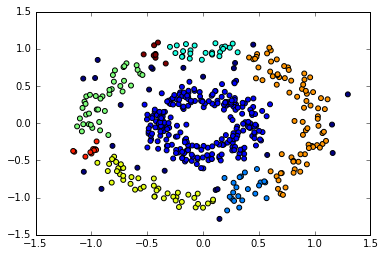

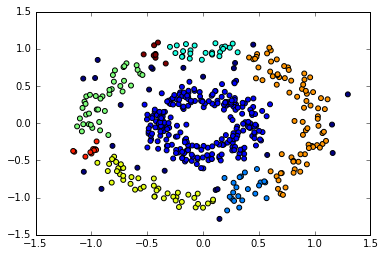

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from scipy.spatial import distance

class DBSCAN:
    
    def __init__(self, eps, min_pts):
        self.eps = eps
        self.min_pts = min_pts
        self.cluster_count = 0
        self.visited = []
        self.clusterID = []
    
    def clustering(self, data):
        self.init_params()
        self.data = data

        for point in data:
            if not self.visited_or_not(point, self.visited):
                self.visited.append(point)
                neighbour_pts = self.region_query(point)
                if len(neighbour_pts) < self.min_pts:
                    self.clusterID.append(-1)
                else:
                    self.expand_cluster(self.cluster_count, point, neighbour_pts)
                    self.cluster_count += 1

    def expand_cluster(self, cluster, point, neighbour_pts):
        
        self.clusterID.append(self.cluster_count)
        for p in neighbour_pts:
            if not self.visited_or_not(p, self.visited):
                self.visited.append(p)
                self.clusterID.append(self.cluster_count)
                np = self.region_query(p)
                if len(np) > 0:
                    for n in np:
                        if not self.visited_or_not(n, neighbour_pts):
                            neighbour_pts.append(n)
                     
    def region_query(self, point):
        result = []
        for d_point in self.data:
            if np.any(d_point!=point):
                if distance.euclidean(d_point, point) <= self.eps:
                    result.append(d_point)
        return result
    
    def visited_or_not(self, point, target_set):
        visited = False
        for d_point in target_set:
            if np.any(d_point==point):
                visited = True
                break
        return visited

    def init_params(self):
        self.cluster_count = 0
        self.clusterID = []
        self.visited = []   
        
Points = loadmat('DBSCAN-Points.mat')
X = Points['Points']

dbc = DBSCAN(0.12, 3)
dbc.clustering(X)

labels = np.copy(dbc.clusterID)
for i,point in enumerate(X):
    for index,d_point in enumerate(dbc.visited):
        if np.all(d_point==point):
            labels[i] = dbc.clusterID[index]

fig = plt.figure()
plt.scatter(X[:,0], X[:,1], 24, c=labels)
plt.show()

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.12, min_samples=3).fit(X)

fig = plt.figure()
plt.scatter(X[:,0], X[:,1], 24, c=db.labels_)
plt.show()